# Kaggle 신용카드 부정결제 검출 
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : <font color = 'blue'>'0' (정상결제)</font>, <font color = 'red'>'1' (부정결제)</font>
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'creditCardFraud.zip' 파일 다운로드

In [3]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip

--2023-03-22 09:06:29--  https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditCardFraud.zip’

creditCardFraud.zip 100%[===================>]  65.95M   102MB/s    in 0.6s    

2023-03-22 09:06:30 (102 MB/s) - ‘creditCardFraud.zip’ saved [69155672/69155672]



* 다운로드 결과 확인

In [4]:
!ls -l 

total 67540
-rw-r--r-- 1 root root 69155672 Mar 22 09:06 creditCardFraud.zip
drwxr-xr-x 1 root root     4096 Mar 20 13:36 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [5]:
!unzip creditCardFraud.zip

Archive:  creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [6]:
!ls -l

total 214836
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Mar 22 09:06 creditCardFraud.zip
drwxr-xr-x 1 root root      4096 Mar 20 13:36 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [7]:
%%time

import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* '0' (정상) Class와 '1' (부정) Class 개수

In [9]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* '0' (정상) Class와 '1' (부정) Class 비율

In [10]:
DF.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [11]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) Visualization

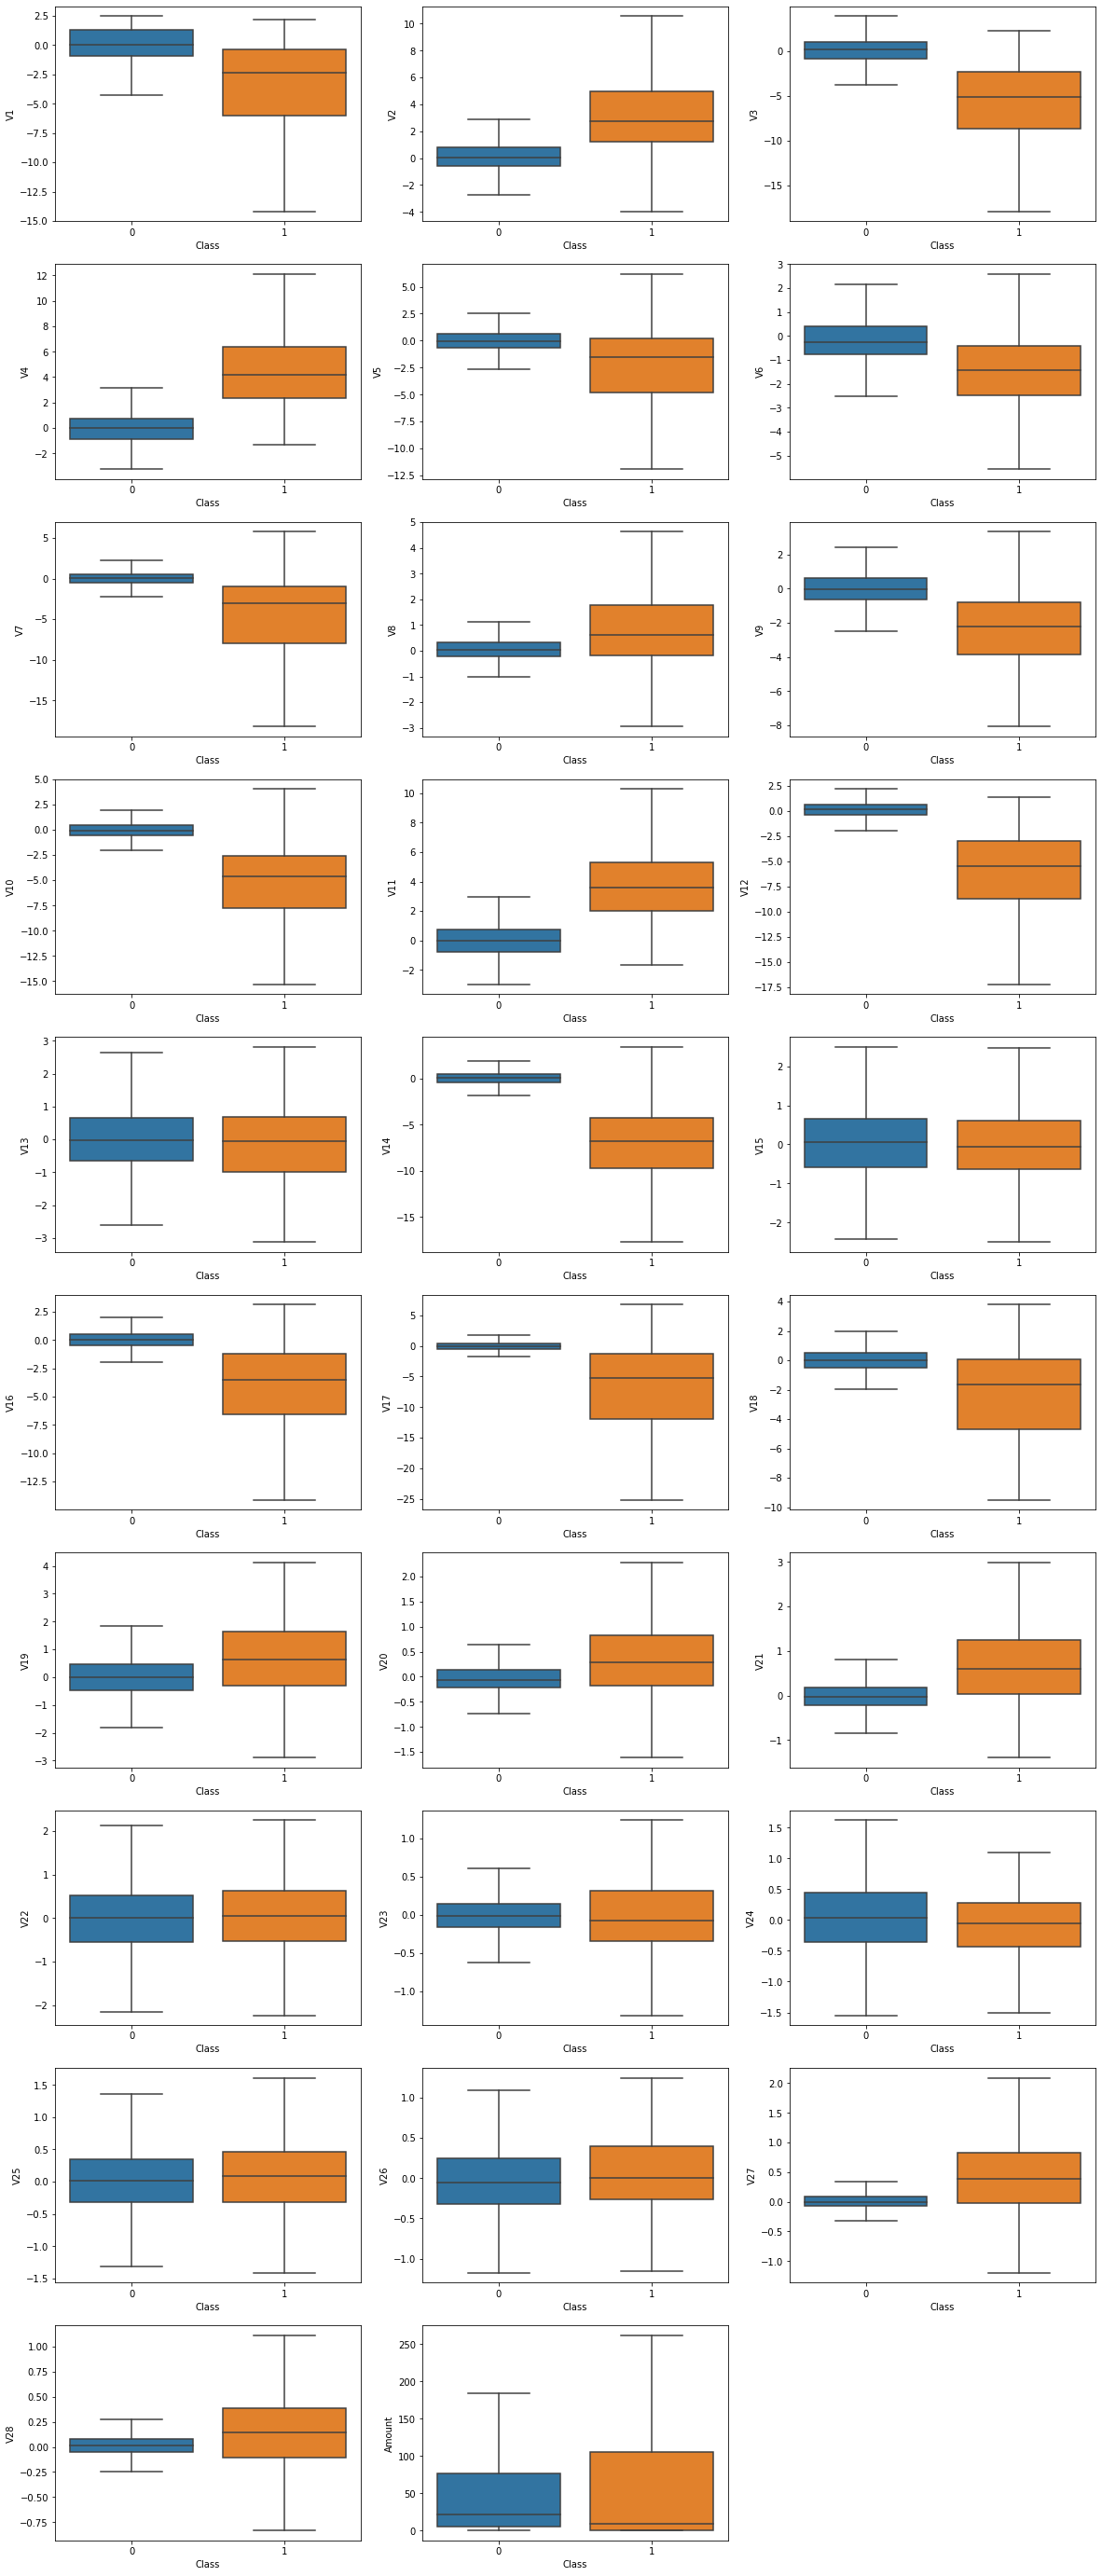

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 50))

for index, col_names in enumerate(DF.columns[:-1]):
  ax1 = plt.subplot(10, 3, index + 1)
  sns.boxplot(data = DF,
              x = 'Class', 
              y = col_names,
              order = [0, 1],
              showfliers = False,
              ax = ax1)
  
plt.show()

# III. train_test_split( ) 

* X (Input), y (Output) 지정
 - 7: 3
 - random_state = 2045

> ## 1)Without 'stratify'

In [13]:
from sklearn.model_selection import train_test_split

X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

X.shape, y.shape

((284807, 29), (284807,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [14]:
print('Train_Data :','\n', y_train.value_counts(normalize = True))
print()
print('Test_Data :','\n', y_test.value_counts(normalize = True))

Train_Data : 
 0    0.998254
1    0.001746
Name: Class, dtype: float64

Test_Data : 
 0    0.998315
1    0.001685
Name: Class, dtype: float64


> ## 2) With 'stratify'

In [15]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [16]:
print('Train_Data :','\n', y_train.value_counts(normalize = True))
print()
print('Test_Data :','\n', y_test.value_counts(normalize = True))

Train_Data : 
 0    0.998275
1    0.001725
Name: Class, dtype: float64

Test_Data : 
 0    0.998268
1    0.001732
Name: Class, dtype: float64


# IV. Modeling - Logistic Regression

> ## 1) Model 학습

In [17]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

> ## 2) 예측값 생성

In [18]:
y_hat = Model_lr.predict(X_test)

> ## 3) Recall

In [20]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_hat))

0.7635135135135135


> ## 4) Classification Report

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['0', '1'],
                            digits = 5))

              precision    recall  f1-score   support

           0    0.99959   0.99975   0.99967     85295
           1    0.84328   0.76351   0.80142       148

    accuracy                        0.99934     85443
   macro avg    0.92144   0.88163   0.90055     85443
weighted avg    0.99932   0.99934   0.99933     85443



# V. Modeling - Decison Tree

> ## 1) Model 학습

In [21]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2045)

> ## 2) 예측값 생성

In [22]:
y_hat = Model_dt.predict(X_test)

> ## 3) Model 평가

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels= [1,0])

array([[  120,    28],
       [   32, 85263]])

> ## 4) Recall


In [26]:
print(recall_score(y_test, y_hat))

0.8108108108108109


> ## 5) Classification Report

In [25]:
print(classification_report(y_test, y_hat, 
                            target_names = ['0', '1'],
                            digits = 5))

              precision    recall  f1-score   support

           0    0.99967   0.99962   0.99965     85295
           1    0.78947   0.81081   0.80000       148

    accuracy                        0.99930     85443
   macro avg    0.89457   0.90522   0.89982     85443
weighted avg    0.99931   0.99930   0.99930     85443



> ## 5) Feature Importance

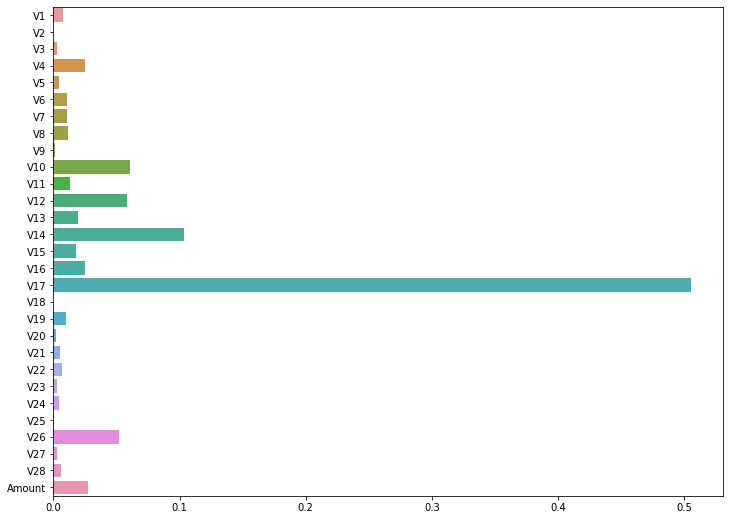

In [27]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_dt.feature_importances_,
            y = X_train.columns)
plt.show()

# VI. Modeling - RandomForest (Ensemble)

> ## 1) Model 학습

In [28]:
from sklearn.ensemble import RandomForestClassifier
Model_rf = RandomForestClassifier(n_estimators = 10,
                                  max_features = 2,
                                  random_state = 2045,
                                  n_jobs = -1)
Model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=10, n_jobs=-1,
                       random_state=2045)

> ## 2) 예측값 생성

In [29]:
y_hat = Model_rf.predict(X_test)

> ## 3) Model 평가

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[  114    34]
 [    6 85289]]


> ## 4) Recall

In [31]:
print(recall_score(y_test, y_hat))

0.7702702702702703


> ## 5) Classification Report

In [32]:
print(classification_report(y_test, y_hat, 
                            target_names = ['0', '1'],
                            digits = 5))

              precision    recall  f1-score   support

           0    0.99960   0.99993   0.99977     85295
           1    0.95000   0.77027   0.85075       148

    accuracy                        0.99953     85443
   macro avg    0.97480   0.88510   0.92526     85443
weighted avg    0.99952   0.99953   0.99951     85443



> ## 6) Feature Importance

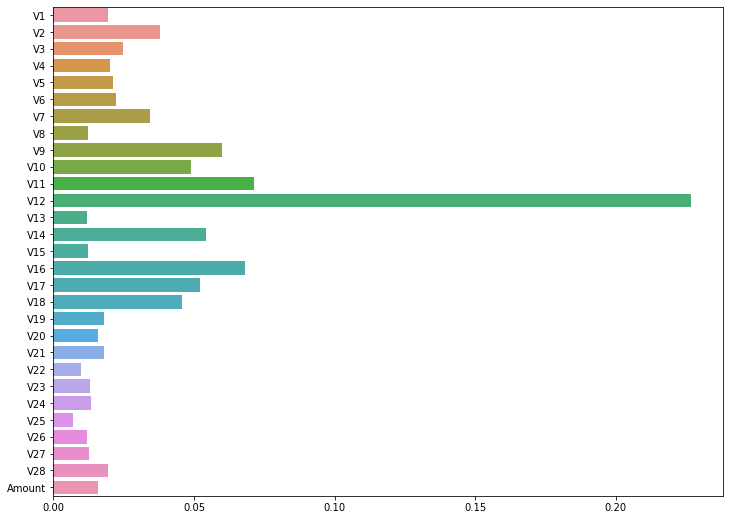

In [33]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_rf.feature_importances_,
            y = X_train.columns)
plt.show()

# 
# 
# 
# The End
# 
# 
# 